In [ ]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#650076','#eb3446','Boogaloo','Smokum',70,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h4 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h4>"""%string))
    
    
dhtml('Feedback Prize : Starter EDA' )

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #13003A;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px #F8FFBE;
	border-radius: 0 10px 0 15px;
	background: #fff
    
}
</style>
""")

<h1 style="background-color:#F0C3FF;font-size:30px;color:#00033E;font-weight : bold">Imports :</h1>

In [ ]:
import os
import spacy
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.util import ngrams
import nltk
from tqdm.notebook import tqdm
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import os

In [ ]:
train_dir = "../input/feedback-prize-effectiveness/train"
test_dir = "../input/feedback-prize-effectiveness/test"
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

for file in range(len(train_files)):
    train_files[file] = str(train_dir) + "/" +  str(train_files[file])
for file in range(len(test_files)):
    test_files[file] = str(test_dir) + "/" +  str(test_files[file])
    
train = pd.read_csv("../input/feedback-prize-effectiveness/train.csv")
sub = pd.read_csv("../input/feedback-prize-effectiveness/sample_submission.csv")

In [ ]:
print("\033[95mTotal number of train files = " , len(train_files))
print("\033[95mTotal number of test files = " , len(test_files))

<p style="font-size:15px;color:#1C37A6;font-weight : bold">Sample Train text</p><br>

In [ ]:
f = open(train_files[0], "r")
print("\033[95m",f.read())

<p style="font-size:15px;color:#1C37A6;font-weight : bold">Sample Test text</p><br>

In [ ]:
f = open(test_files[0], "r")
print("\033[95m" , f.read())

<p style="font-size:15px;color:#1C37A6;font-weight : bold">Unique Type of discourse</p><br>

In [ ]:
print("\033[96m", train.discourse_type.unique().tolist())

<p style="font-size:15px;color:#1C37A6;font-weight : bold">Number of rows and check of null rows</p><br>

In [ ]:
print("\033[96mNumber of rows in train dataframe = " , len(train))

In [ ]:
print("\033[95m",train.isnull().sum())

In [ ]:
!pip install textstat

In [ ]:
train_df=train.copy()

In [ ]:
import textstat
train_df.head()

<h1 style="background-color:#F0C3FF;font-size:30px;color:#00033E;font-weight : bold">Creating new columns using Textstat :</h1>

In [ ]:
train_df['Reading_Time'] = 0
train_df['Average_Char_per_Word'] = 0
train_df['Average_Sen_Length'] = 0
train_df['Average_Syllables_per_Word'] = 0
train_df['Word_Count'] = 0
for i in range(len(train_df)):
    train_df['Reading_Time'][i] = textstat.flesch_reading_ease(train_df['discourse_text'][i])
    train_df['Average_Char_per_Word'][i] = textstat.avg_character_per_word(train_df['discourse_text'][i])
    train_df['Average_Sen_Length'][i] = textstat.avg_sentence_length(train_df['discourse_text'][i])
    train_df['Average_Syllables_per_Word'][i] = textstat.avg_syllables_per_word(train_df['discourse_text'][i])
    train_df['Word_Count'][i] = textstat.lexicon_count(train_df['discourse_text'][i])
    

In [ ]:
train_df.head()

<h1 style="background-color:#F0C3FF;font-size:30px;color:#00033E;font-weight : bold">Reading time Variation across all discourse type :</h1>

In [ ]:
fig=px.histogram(data_frame=train_df,x=train_df.Reading_Time,marginal="violin",color=train_df.discourse_type)

fig.update_layout(title="Reading Time Variation wrt all discourse type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f1=train_df[train_df['discourse_type']=='Lead']
fig=px.histogram(data_frame=f1,x=f1.Reading_Time,marginal="violin",color=f1.discourse_type,color_discrete_sequence=['pink'])

fig.update_layout(title="Reading Time Variation wrt Lead type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f2=train_df[train_df['discourse_type']=='Position']
fig=px.histogram(data_frame=f2,x=f2.Reading_Time,marginal="violin",color=f2.discourse_type,color_discrete_sequence=['violet'])

fig.update_layout(title="Reading Time Variation wrt Position type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f3=train_df[train_df['discourse_type']=='Claim']
fig=px.histogram(data_frame=f3,x=f3.Reading_Time,marginal="violin",color=f3.discourse_type,color_discrete_sequence=['goldenrod'])

fig.update_layout(title="Reading Time Variation wrt Claim type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f4=train_df[train_df['discourse_type']=='Evidence']
fig=px.histogram(data_frame=f4,x=f4.Reading_Time,marginal="violin",color=f4.discourse_type,color_discrete_sequence=['tomato'])

fig.update_layout(title="Reading Time Variation wrt Evidence type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f5=train_df[train_df['discourse_type']=='Counterclaim']
fig=px.histogram(data_frame=f5,x=f5.Reading_Time,marginal="violin",color=f5.discourse_type,color_discrete_sequence=['cornflowerblue'])

fig.update_layout(title="Reading Time Variation wrt Counterclaim type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f6=train_df[train_df['discourse_type']=='Rebuttal']
fig=px.histogram(data_frame=f6,x=f6.Reading_Time,marginal="violin",color=f6.discourse_type,color_discrete_sequence=['gray'])

fig.update_layout(title="Reading Time Variation wrt Rebuttal type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f7=train_df[train_df['discourse_type']=='Concluding Statement']
fig=px.histogram(data_frame=f7,x=f7.Reading_Time,marginal="violin",color=f7.discourse_type,color_discrete_sequence=['forestgreen'])

fig.update_layout(title="Reading Time Variation wrt Concluding Statement type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

<h1 style="background-color:#F0C3FF;font-size:30px;color:#00033E;font-weight : bold">Average Character per word for all discourse type :</h1>

In [ ]:
fig=px.histogram(data_frame=train_df,x=train_df.Average_Char_per_Word,marginal="violin",color=train_df.discourse_type)

fig.update_layout(title="Average Char per word Variation wrt all discourse type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f1=train_df[train_df['discourse_type']=='Lead']
fig=px.histogram(data_frame=f1,x=f1.Average_Char_per_Word,marginal="violin",color=f1.discourse_type,color_discrete_sequence=['pink'])

fig.update_layout(title="Average Char per word Variation wrt Lead type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f2=train_df[train_df['discourse_type']=='Position']
fig=px.histogram(data_frame=f2,x=f2.Average_Char_per_Word,marginal="violin",color=f2.discourse_type,color_discrete_sequence=['violet'])

fig.update_layout(title="Average Char per word Variation wrt Position type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f3=train_df[train_df['discourse_type']=='Claim']
fig=px.histogram(data_frame=f3,x=f3.Average_Char_per_Word,marginal="violin",color=f3.discourse_type,color_discrete_sequence=['goldenrod'])

fig.update_layout(title="Average Char per word Variation wrt Claim type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f4=train_df[train_df['discourse_type']=='Evidence']
fig=px.histogram(data_frame=f4,x=f4.Average_Char_per_Word,marginal="violin",color=f4.discourse_type,color_discrete_sequence=['tomato'])

fig.update_layout(title="Average Char per word Variation wrt Evidence type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f5=train_df[train_df['discourse_type']=='Counterclaim']
fig=px.histogram(data_frame=f5,x=f5.Average_Char_per_Word,marginal="violin",color=f5.discourse_type,color_discrete_sequence=['cornflowerblue'])

fig.update_layout(title="Average Char per word Variation wrt Counterclaim type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f6=train_df[train_df['discourse_type']=='Rebuttal']
fig=px.histogram(data_frame=f6,x=f6.Average_Char_per_Word,marginal="violin",color=f6.discourse_type,color_discrete_sequence=['gray'])

fig.update_layout(title="Average Char per word Variation wrt Rebuttal type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f7=train_df[train_df['discourse_type']=='Concluding Statement']
fig=px.histogram(data_frame=f7,x=f7.Average_Char_per_Word,marginal="violin",color=f7.discourse_type,color_discrete_sequence=['forestgreen'])

fig.update_layout(title="Average Char per word Variation wrt Concluding Statement type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

<h1 style="background-color:#F0C3FF;font-size:30px;color:#00033E;font-weight : bold">Average Sentence Length for all discourse type :</h1>

In [ ]:
fig=px.histogram(data_frame=train_df,x=train_df.Average_Sen_Length,marginal="violin",color=train_df.discourse_type)

fig.update_layout(title="Average Sentence Length for all discourse type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f1=train_df[train_df['discourse_type']=='Lead']
fig=px.histogram(data_frame=f1,x=f1.Average_Sen_Length,marginal="violin",color=f1.discourse_type,color_discrete_sequence=['pink'])

fig.update_layout(title="Average Sentence Length for Lead type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f2=train_df[train_df['discourse_type']=='Position']
fig=px.histogram(data_frame=f2,x=f2.Average_Sen_Length,marginal="violin",color=f2.discourse_type,color_discrete_sequence=['violet'])

fig.update_layout(title="Average Sentence Length for Position type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f3=train_df[train_df['discourse_type']=='Claim']
fig=px.histogram(data_frame=f3,x=f3.Average_Sen_Length,marginal="violin",color=f3.discourse_type,color_discrete_sequence=['goldenrod'])

fig.update_layout(title="Average Sentence Length for Claim type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f4=train_df[train_df['discourse_type']=='Evidence']
fig=px.histogram(data_frame=f4,x=f4.Average_Sen_Length,marginal="violin",color=f4.discourse_type,color_discrete_sequence=['tomato'])

fig.update_layout(title="Average Sentence Length for Evidence type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f5=train_df[train_df['discourse_type']=='Counterclaim']
fig=px.histogram(data_frame=f5,x=f5.Average_Sen_Length,marginal="violin",color=f5.discourse_type,color_discrete_sequence=['cornflowerblue'])

fig.update_layout(title="Average Sentence Length for Counterclaim type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f6=train_df[train_df['discourse_type']=='Rebuttal']
fig=px.histogram(data_frame=f6,x=f6.Average_Sen_Length,marginal="violin",color=f6.discourse_type,color_discrete_sequence=['gray'])

fig.update_layout(title="Average Sentence Length for Rebuttal type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f7=train_df[train_df['discourse_type']=='Concluding Statement']
fig=px.histogram(data_frame=f7,x=f7.Average_Sen_Length,marginal="violin",color=f7.discourse_type,color_discrete_sequence=['forestgreen'])

fig.update_layout(title="Average Sentence Length for Concluding Statement type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

<h1 style="background-color:#F0C3FF;font-size:30px;color:#00033E;font-weight : bold">Average syllables for all discourse type :</h1>

In [ ]:
fig=px.histogram(data_frame=train_df,x=train_df.Average_Syllables_per_Word,marginal="violin",color=train_df.discourse_type)

fig.update_layout(title="Average syllables per word for all discourse type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f1=train_df[train_df['discourse_type']=='Lead']
fig=px.histogram(data_frame=f1,x=f1.Average_Syllables_per_Word,marginal="violin",color=f1.discourse_type,color_discrete_sequence=['pink'])

fig.update_layout(title="Average syllables per word for Lead type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f2=train_df[train_df['discourse_type']=='Position']
fig=px.histogram(data_frame=f2,x=f2.Average_Syllables_per_Word,marginal="violin",color=f2.discourse_type,color_discrete_sequence=['violet'])

fig.update_layout(title="Average syllables per word for Position type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f3=train_df[train_df['discourse_type']=='Claim']
fig=px.histogram(data_frame=f3,x=f3.Average_Syllables_per_Word,marginal="violin",color=f3.discourse_type,color_discrete_sequence=['goldenrod'])

fig.update_layout(title="Average syllables per word for Claim type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f4=train_df[train_df['discourse_type']=='Evidence']
fig=px.histogram(data_frame=f4,x=f4.Average_Syllables_per_Word,marginal="violin",color=f4.discourse_type,color_discrete_sequence=['tomato'])

fig.update_layout(title="Average syllables per word for Evidence type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f5=train_df[train_df['discourse_type']=='Counterclaim']
fig=px.histogram(data_frame=f5,x=f5.Average_Syllables_per_Word,marginal="violin",color=f5.discourse_type,color_discrete_sequence=['cornflowerblue'])

fig.update_layout(title="Average syllables per word for Counterclaim type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f6=train_df[train_df['discourse_type']=='Rebuttal']
fig=px.histogram(data_frame=f6,x=f6.Average_Syllables_per_Word,marginal="violin",color=f6.discourse_type,color_discrete_sequence=['gray'])

fig.update_layout(title="Average syllables per word for Rebuttal type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f7=train_df[train_df['discourse_type']=='Concluding Statement']
fig=px.histogram(data_frame=f7,x=f7.Average_Syllables_per_Word,marginal="violin",color=f7.discourse_type,color_discrete_sequence=['forestgreen'])

fig.update_layout(title="Average syllables per word for Concluding Statement type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

<h1 style="background-color:#F0C3FF;font-size:30px;color:#00033E;font-weight : bold">Word Count for all discourse type :</h1>

In [ ]:
fig=px.histogram(data_frame=train_df,x=train_df.Word_Count,marginal="violin",color=train_df.discourse_type)

fig.update_layout(title="Word Count for all discourse type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f1=train_df[train_df['discourse_type']=='Lead']
fig=px.histogram(data_frame=f1,x=f1.Word_Count,marginal="violin",color=f1.discourse_type,color_discrete_sequence=['pink'])

fig.update_layout(title="Word Countfor Lead type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f2=train_df[train_df['discourse_type']=='Position']
fig=px.histogram(data_frame=f2,x=f2.Word_Count,marginal="violin",color=f2.discourse_type,color_discrete_sequence=['violet'])

fig.update_layout(title="Word Count for Position type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f3=train_df[train_df['discourse_type']=='Claim']
fig=px.histogram(data_frame=f3,x=f3.Word_Count,marginal="violin",color=f3.discourse_type,color_discrete_sequence=['goldenrod'])

fig.update_layout(title="Word Count for Claim type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f4=train_df[train_df['discourse_type']=='Evidence']
fig=px.histogram(data_frame=f4,x=f4.Word_Count,marginal="violin",color=f4.discourse_type,color_discrete_sequence=['tomato'])

fig.update_layout(title="Word Count for Evidence type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f5=train_df[train_df['discourse_type']=='Counterclaim']
fig=px.histogram(data_frame=f5,x=f5.Word_Count,marginal="violin",color=f5.discourse_type,color_discrete_sequence=['cornflowerblue'])

fig.update_layout(title="Word Count for Counterclaim type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f6=train_df[train_df['discourse_type']=='Rebuttal']
fig=px.histogram(data_frame=f6,x=f6.Word_Count,marginal="violin",color=f6.discourse_type,color_discrete_sequence=['gray'])

fig.update_layout(title="Word Count for Rebuttal type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f7=train_df[train_df['discourse_type']=='Concluding Statement']
fig=px.histogram(data_frame=f7,x=f7.Word_Count,marginal="violin",color=f7.discourse_type,color_discrete_sequence=['forestgreen'])

fig.update_layout(title="Word Count for Concluding Statement type:",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

<h1 style="background-color:#F0C3FF;font-size:30px;color:#00033E;font-weight : bold">Discourse Type Distribution:</h1>

In [ ]:
values = train_df['discourse_type'].value_counts()
labels=values.index
text=values.index
fig = go.Figure(data=[go.Pie(values=values,labels=labels,hole=.3,pull=[0.1,0,0,0,0,0,0])])
fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=3)))
fig.update_layout(title="Discourse Type Distribution ",
                  titlefont={'size': 25},
                  )
fig.show()

<h1 style="background-color:#F0C3FF;font-size:30px;color:#00033E;font-weight : bold">Most Occuring Bigrams across all types :</h1>

In [ ]:
def get_n_grams(n_grams, top_n = 10):
    df_words = pd.DataFrame()
    for dt in tqdm(train['discourse_type'].unique()):
        df = train.query('discourse_type == @dt')
        texts = df['discourse_text'].tolist()
        vec = CountVectorizer(lowercase = True, stop_words = 'english',\
                              ngram_range=(n_grams, n_grams)).fit(texts)
        bag_of_words = vec.transform(texts)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        cvec_df = pd.DataFrame.from_records(words_freq,\
                                            columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
        cvec_df.insert(0, "Discourse_type", dt)
        cvec_df = cvec_df.iloc[:top_n,:]
        df_words = df_words.append(cvec_df)
    return df_words

In [ ]:
bigrams = get_n_grams(n_grams = 2, top_n=10)
bigrams.head()

In [ ]:
f1=bigrams[bigrams['Discourse_type']=='Lead']
fig=px.histogram(y=f1['counts'],x=f1['words'],color=f1.Discourse_type,color_discrete_sequence=['pink'])

fig.update_layout(title="Bigrams in Lead :",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f2=bigrams[bigrams['Discourse_type']=='Position']
fig=px.histogram(y=f2['counts'],x=f2['words'],color=f2.Discourse_type,color_discrete_sequence=['violet'])

fig.update_layout(title="Bigrams in Position :",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()


f3=bigrams[bigrams['Discourse_type']=='Claim']
fig=px.histogram(y=f3['counts'],x=f3['words'],color=f3.Discourse_type,color_discrete_sequence=['goldenrod'])

fig.update_layout(title="Bigrams in Claim :",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f4=bigrams[bigrams['Discourse_type']=='Evidence']
fig=px.histogram(y=f4['counts'],x=f4['words'],color=f4.Discourse_type,color_discrete_sequence=['tomato'])

fig.update_layout(title="Bigrams in Evidence :",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f5=bigrams[bigrams['Discourse_type']=='Counterclaim']
fig=px.histogram(y=f5['counts'],x=f5['words'],color=f5.Discourse_type,color_discrete_sequence=['cornflowerblue'])

fig.update_layout(title="Bigrams in Counterclaim :",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f6=bigrams[bigrams['Discourse_type']=='Rebuttal']
fig=px.histogram(y=f6['counts'],x=f6['words'],color=f6.Discourse_type,color_discrete_sequence=['gray'])

fig.update_layout(title="Bigrams in Rebuttal :",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

f7=bigrams[bigrams['Discourse_type']=='Concluding Statement']
fig=px.histogram(y=f7['counts'],x=f7['words'],color=f7.Discourse_type,color_discrete_sequence=['forestgreen'])

fig.update_layout(title="Bigrams in Concluding Statement :",
                  titlefont={'size': 25},template='plotly_white'     
                  )
fig.show()

<h1 style="background-color:#F0C3FF;font-size:30px;color:#00033E;font-weight : bold">Displacy Magic [In progress] :</h1>

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
x=train_df['discourse_text'][0]
doc=nlp(x)
displacy.render(doc,style='ent')
x=train_df['discourse_text'][2]
doc=nlp(x)
displacy.render(doc,style='ent')
x=train_df['discourse_text'][4]
doc=nlp(x)
displacy.render(doc,style='ent')
x=train_df['discourse_text'][6]
doc=nlp(x)
displacy.render(doc,style='ent')
x=train_df['discourse_text'][8]
doc=nlp(x)
displacy.render(doc,style='ent')

References:
https://www.kaggle.com/code/odins0n/feedback-prize-eda
https://www.kaggle.com/code/erikbruin/nlp-on-student-writing-eda


In [ ]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#000CA4','#eb3446','Boogaloo','Smokum',70,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h4 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h4>"""%string))
    
    
dhtml(' Do UPVOTE if you like my work ' )

![](https://media.istockphoto.com/illustrations/work-in-progress-loading-bar-illustration-id508408464?k=20&m=508408464&s=612x612&w=0&h=jgUij04wrlpVxQQUL3ItdMSody7WBRycp8snNirbww0=)

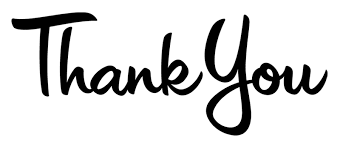